Proceso de Exploratory Data Analysis (EDA)

En el contexto de nuestro proyecto de ciencia de datos, dedicamos especial atención a la etapa de Exploratory Data Analysis (EDA), un componente fundamental que nos permite comprender profundamente nuestros datos antes de proceder con el desarrollo de modelos predictivos o de aprendizaje automático. La EDA es un proceso iterativo que nos permite descubrir patrones, tendencias y relaciones ocultas en los datos, lo cual es esencial para el éxito de nuestro sistema de recomendación de películas.

Abordaremos varios pasos clave que nos permiten explorar nuestros datos de manera exhaustiva.

1. Entender nuestro objetivo de Analisis.
2. Revision inicial de los datos.
3. Describir estadisticamente los datos.
4. Visualizar los datos.
5. Detectar Outliers y Anomalias.
6. Explorar relaciones entre nuestras Variables.
7. Edentificar Patrones y Tendencias.
8. Formulamos Hipotesis basadas en nuestros hallazgos.

Al final de esta etapa, hemos adquirido una comprensión profunda de nuestros datos, lo cual nos posiciona favorablemente para el desarrollo de un sistema de recomendación de películas efectivo y preciso. La EDA ha sido un pilar fundamental en nuestro camino hacia el éxito de este proyecto, permitiéndonos identificar oportunidades y desafíos que han guiado el diseño y la implementación de nuestro modelo de recomendación.

Implementamos todas ls Librerias Necesarias

In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [10]:
# Cargamos los Datasets que usaremos

peliculas = pd.read_parquet('DataSets_Clean/df_movies_limpio.parquet')
creditos = pd.read_parquet('DataSets_Clean/df_credits_limpio.parquet')
generos = pd.read_parquet('DataSets_Clean/df_genres_limpio.parquet')

 Realicemos una inspeccion Inicial de los Datos

In [4]:
print(peliculas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45376 non-null  float64
 1   id                 45376 non-null  float64
 2   original_language  45368 non-null  object 
 3   popularity         45377 non-null  object 
 4   release_date       45376 non-null  object 
 5   revenue            45379 non-null  float64
 6   title              45376 non-null  object 
 7   vote_average       45376 non-null  float64
 8   vote_count         45376 non-null  float64
 9   release_year       45376 non-null  float64
 10  return             45379 non-null  float64
dtypes: float64(7), object(4)
memory usage: 3.8+ MB
None


In [5]:
print(creditos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312606 entries, 0 to 312605
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           312606 non-null  int64  
 1   character    303903 non-null  object 
 2   cast_gender  312606 non-null  float64
 3   Actores      312606 non-null  object 
 4   department   312606 non-null  object 
 5   crew_gender  312606 non-null  float64
 6   job          312606 non-null  object 
 7   Diretores    312606 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 19.1+ MB
None


In [6]:
print(generos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93432 entries, 0 to 93431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      91048 non-null  float64
 1   name    91048 non-null  object 
 2   0       0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 2.1+ MB
None


In [7]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

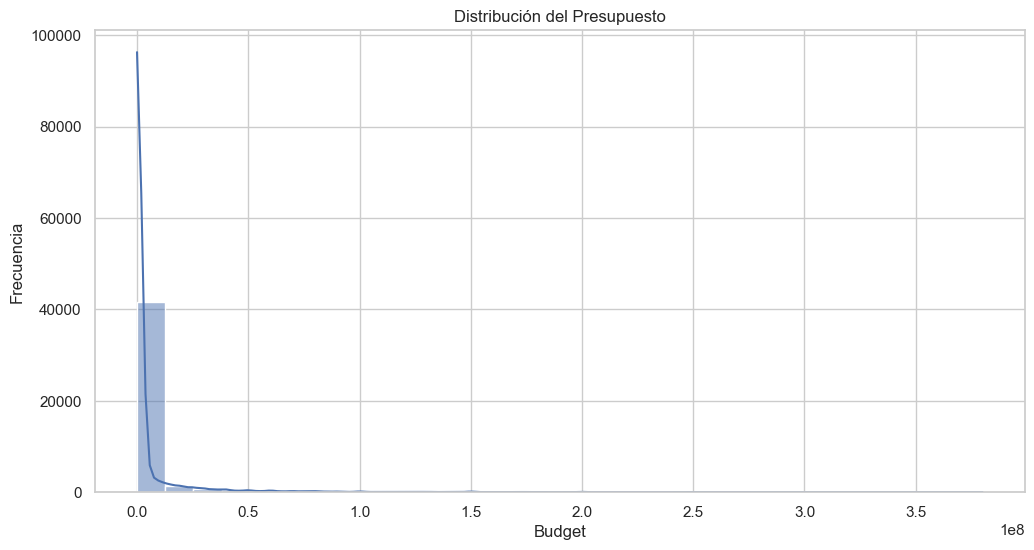

In [8]:
# Analisis Univariado

# Variables Numericas

# Histograma de presupuesto
plt.figure(figsize=(12, 6))
sns.histplot(peliculas['budget'], bins=30, kde=True)
plt.title('Distribución del Presupuesto')
plt.xlabel('Budget')
plt.ylabel('Frecuencia')
plt.show()

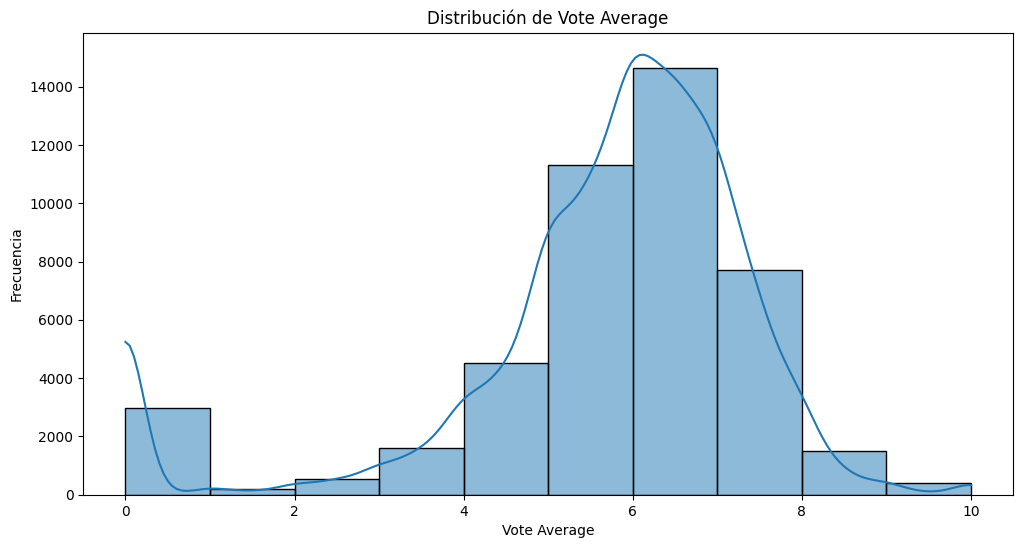

In [4]:
# Histograma de vote_average

peliculas = pd.read_parquet("DataSets_Clean\df_movies_limpio.parquet")

plt.figure(figsize=(12, 6))
sns.histplot(peliculas['vote_average'], bins=10, kde=True)
plt.title('Distribución de Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frecuencia')
plt.show()


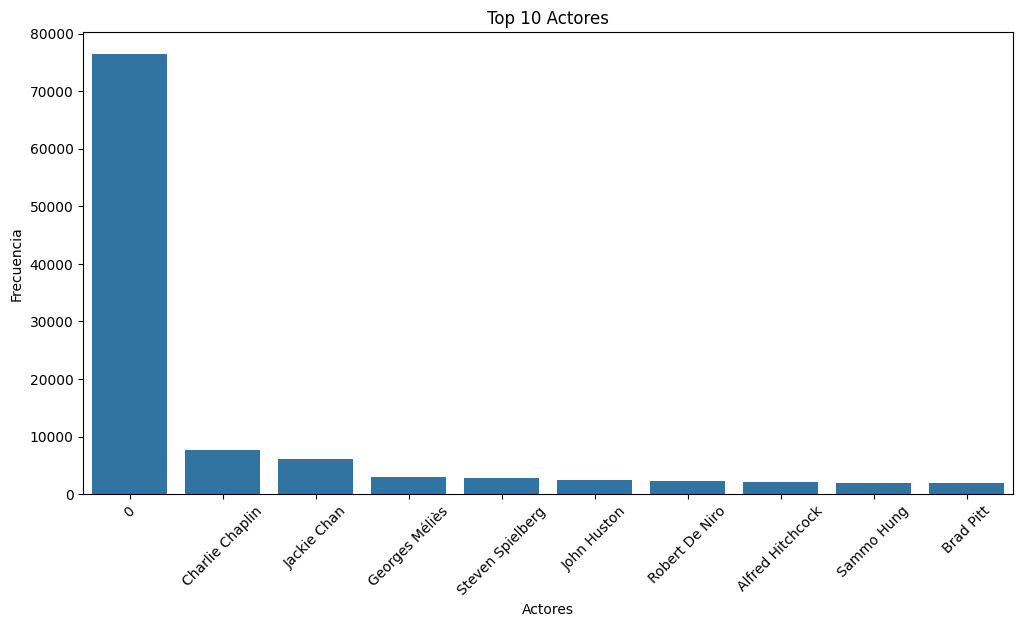

In [4]:
# Variables Categoricas

import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns

creditos = pd.read_parquet("DataSets_Clean\df_credits_limpio.parquet")

# Conteo de géneros
generos_count = creditos["Actores"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=generos_count.index, y=generos_count.values)
plt.title('Top 10 Actores')
plt.xlabel('Actores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Verificar valores nulos

print(creditos.isnull().sum())

id                0
character      8703
cast_gender       0
Actores           0
department        0
crew_gender       0
job               0
Diretores         0
dtype: int64


Analisis Bivariado

Analizemos la relación entre las variables, especialmente entre el género y otras variables.

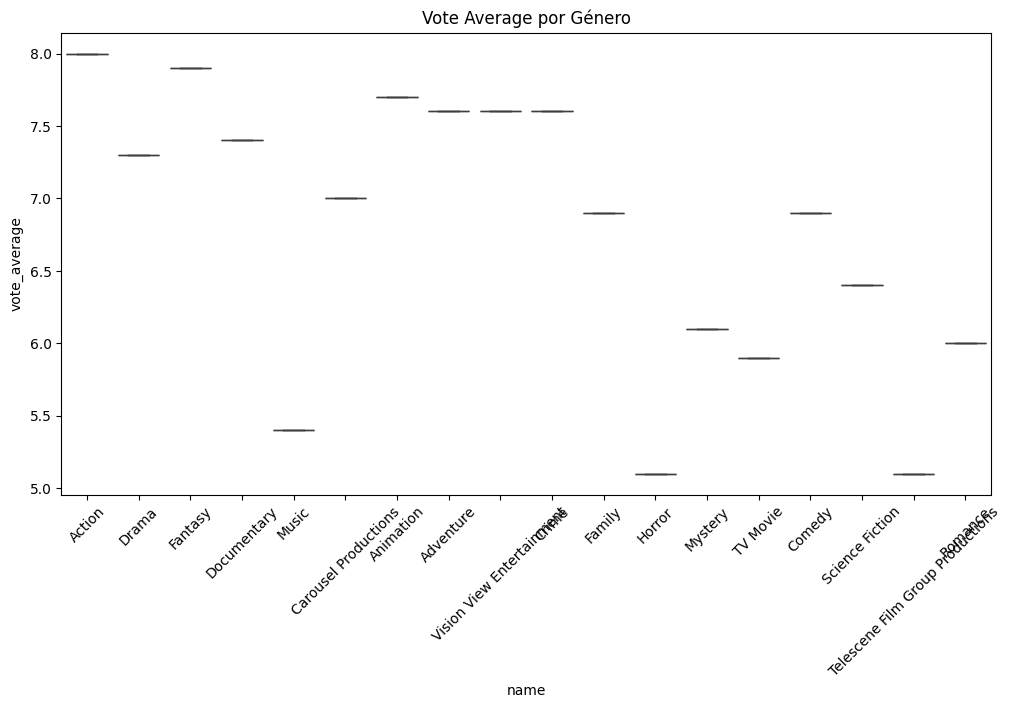

In [8]:
# Relación entre Género y Vote_Average de cada pelicula

# Primero necesitamos combinar los datasets para poder analizar

creditos = pd.read_parquet("DataSets_Clean\df_credits_limpio.parquet")
peliculas = pd.read_parquet("DataSets_Clean\df_movies_limpio.parquet")
generos = pd.read_parquet("DataSets_Clean\df_genres_limpio.parquet")

# Combinar datasets
peliculas_generos = peliculas.merge(creditos, on='id', how='left')
peliculas_generos = peliculas_generos.merge(generos, left_on='id', right_on='id', how='left')

# Gráfico de caja para vote_average por género
plt.figure(figsize=(12, 6))
sns.boxplot(x='name', y='vote_average', data=peliculas_generos)
plt.title('Vote Average por Género')
plt.xticks(rotation=45)
plt.show()



In [4]:
# Correlaciones

correlation_matrix = peliculas.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


NameError: name 'peliculas' is not defined

In [6]:
# Analisis de tendencias temporales

import pandas as pd

# Convertir release_date a datetime
peliculas['release_date'] = pd.to_datetime(peliculas['release_date'])

# Agrupar por año
peliculas['year'] = peliculas['release_date'].dt.year
tendencia_popularidad = peliculas.groupby('year')['popularity'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=tendencia_popularidad.index, y=tendencia_popularidad.values)
plt.title('Tendencia de Popularidad a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Popularidad Promedio')
plt.show()


NameError: name 'peliculas' is not defined

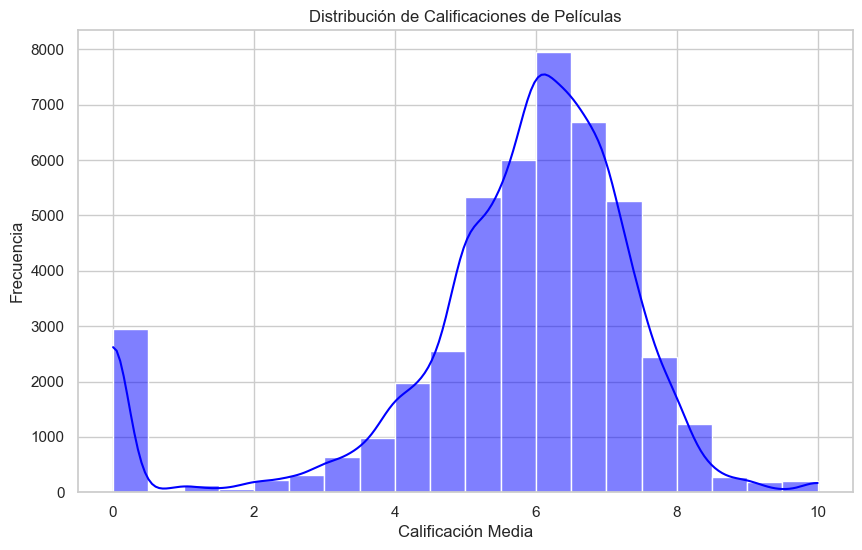

In [4]:
# 1. Distribución de Calificaciones
plt.figure(figsize=(10, 6))
sns.histplot(peliculas['vote_average'], bins=20, kde=True, color='blue')
plt.title('Distribución de Calificaciones de Películas')
plt.xlabel('Calificación Media')
plt.ylabel('Frecuencia')
plt.show()

Un histograma con una curva KDE para mostrar cómo se distribuyen las calificaciones de las películas.

In [9]:
# 2. Distribución de la Popularidad
plt.figure(figsize=(10, 6))
sns.histplot(peliculas['popularity'], bins=30, kde=True, color='orange')
plt.title('Distribución de la Popularidad de Películas')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

KeyboardInterrupt: 

Similar al anterior, pero para la popularidad, lo que ayuda a identificar si hay sesgos en las películas populares.

C:\Users\matencio\AppData\Local\Temp\ipykernel_19836\828072111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genero_counts.index, y=genero_counts.values, palette="viridis")


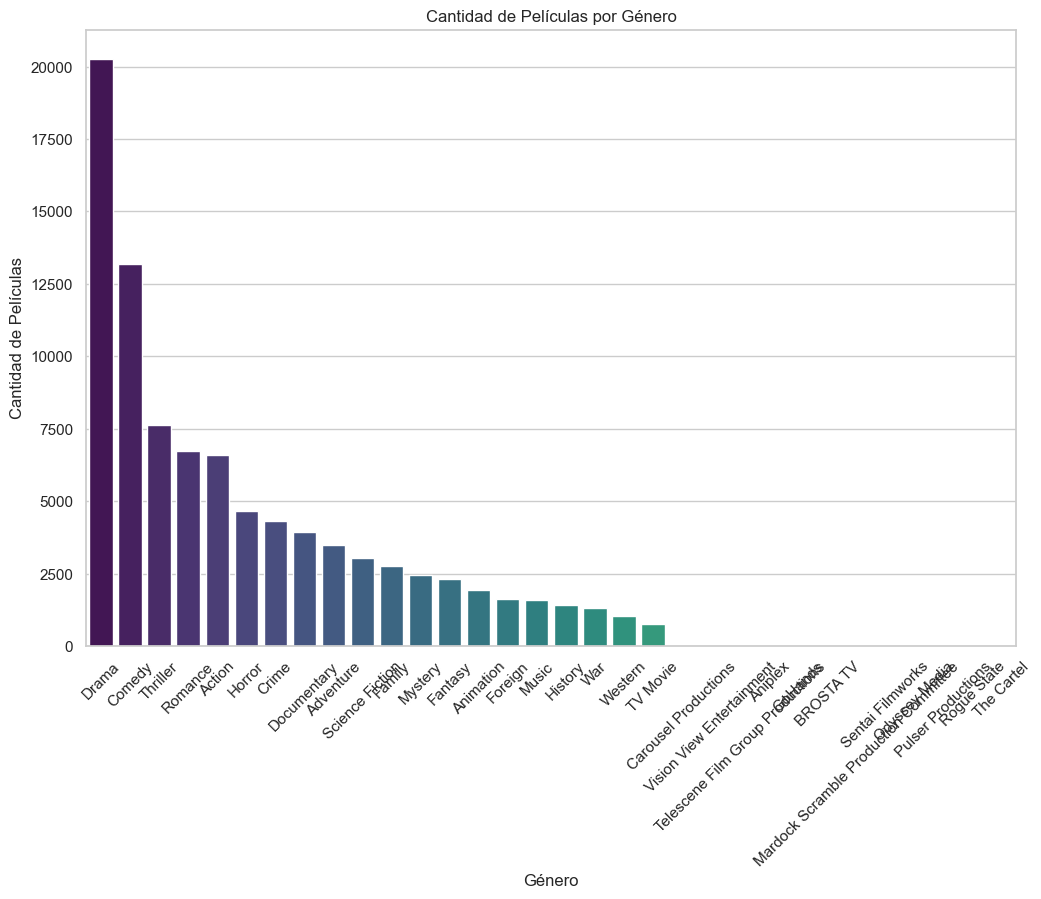

In [10]:
# 3. Análisis de Géneros
plt.figure(figsize=(12, 8))
genero_counts = generos['name'].value_counts()
sns.barplot(x=genero_counts.index, y=genero_counts.values, palette="viridis")
plt.title('Cantidad de Películas por Género')
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.show()

Un gráfico de barras que muestra la cantidad de películas en cada género, ayudando a identificar qué géneros son más comunes.

In [12]:
# 4. Análisis de Votantes por Género
plt.figure(figsize=(12, 8))
sns.boxplot(data=peliculas, x='name', y='vote_average', palette="Set3")
plt.title('Distribución de Calificaciones por Género')
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Calificación Media')
plt.show()

ValueError: Could not interpret value `name` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

Un boxplot que permite visualizar la distribución de calificaciones para cada género, lo que puede revelar si algunos géneros tienden a recibir calificaciones más altas o bajas.

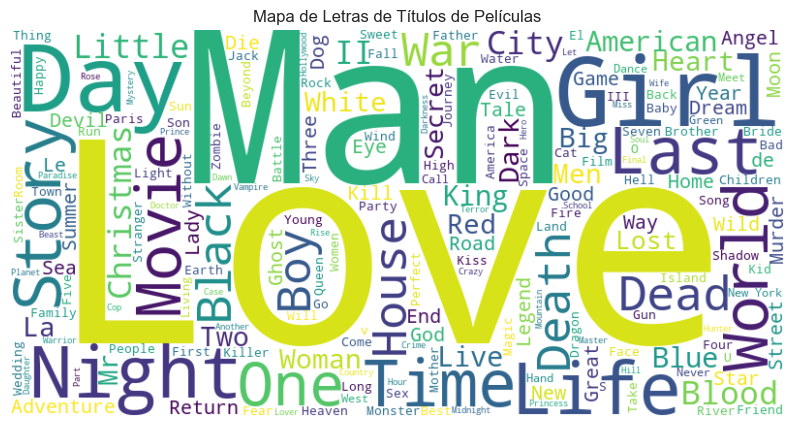

In [18]:
# 5. Mapa de Letras de Títulos de Películas
plt.figure(figsize=(10, 6))
wordcloud_data = ' '.join(peliculas['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Letras de Títulos de Películas')
plt.show()

Un gráfico de palabras que visualiza los títulos de las películas, permitiendo identificar títulos más comunes o populares.

In [20]:
# 6. Correlaciones Más Detalladas
correlation_matrix = peliculas.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación Detallada')
plt.show()

ValueError: could not convert string to float: 'en'

Una matriz de correlación que muestra cómo se relacionan las diferentes variables numéricas en el conjunto de datos.

In [21]:
# 7. Relación entre Votos y Popularidad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=peliculas, x='vote_count', y='popularity', hue='vote_average', size='vote_average', sizes=(20, 200), alpha=0.5)
plt.title('Relación entre Conteo de Votos y Popularidad')
plt.xlabel('Conteo de Votos')
plt.ylabel('Popularidad')
plt.legend()
plt.show()

KeyboardInterrupt: 

Un gráfico de dispersión que muestra la relación entre el conteo de votos y la popularidad, con un tamaño de punto que representa la calificación media.